In [ ]:
import cv2 as cv

# Read Images using OpenCV

In [ ]:
!wget "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"

--2022-12-26 13:30:22--  https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145013 (142K) [binary/octet-stream]
Saving to: ‘rosebud-6006985_1280.jpg’

rosebud-6006985_128 100%[===================>] 141.61K  --.-KB/s    in 0.02s   

2022-12-26 13:30:22 (6.16 MB/s) - ‘rosebud-6006985_1280.jpg’ saved [145013/145013]



In [ ]:
img_color = cv.imread('rosebud-6006985_1280.jpg',1)
img_grayscale = cv.imread('rosebud-6006985_1280.jpg',0)
img_unchanged = cv.imread('rosebud-6006985_1280.jpg',-1)

In [ ]:
### The below won't work ###
"""
cv2.imshow('color image',img_color)
cv2.imshow('grayscale image',img_grayscale)
cv2.imshow('unchanged image',img_unchanged)

"""

"\ncv2.imshow('color image',img_color)\ncv2.imshow('grayscale image',img_grayscale)\ncv2.imshow('unchanged image',img_unchanged)\n\n"

In [ ]:
from matplotlib import pyplot as plt

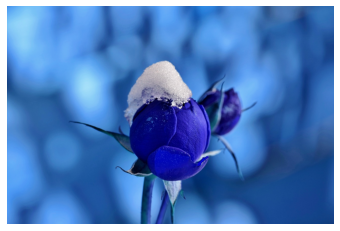

In [ ]:
plt.imshow(img_color)
plt.axis("off")
plt.show()

The displayed image isn't as expected. This happens because OpenCV represents RGB images as multi-dimensional NumPy array but in the reverse order. This means that images are actually represented in BGR order rather than RGB. This can be corrected by converting BGR to RGB.

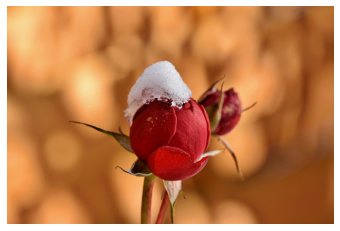

In [ ]:
plt.axis("off")
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.show()

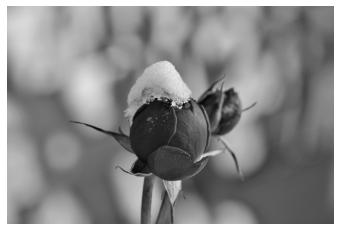

In [ ]:
plt.imshow(cv.cvtColor(img_grayscale, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

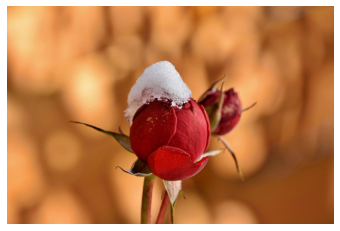

In [ ]:
plt.imshow(cv.cvtColor(img_unchanged, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
cv.imwrite('grayscale.png',img_grayscale)

True

## Image Resizing

In [ ]:
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down = cv.resize(img_unchanged,
                         down_points, 
                         interpolation= cv.INTER_LINEAR)

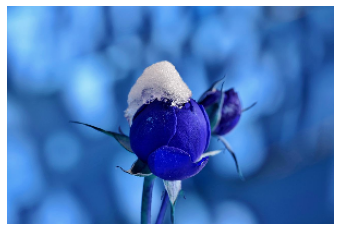

In [ ]:
plt.imshow(resized_down)
plt.axis("off");

In [ ]:
print(resized_down.shape)
print(img_unchanged.shape)

(200, 300, 3)
(853, 1280, 3)


# Binarization of Images

Binarization is of the image is converting a grayscale image into a black and white image (i.e. 0 and 255 pixels respectively).

This can be achieved with the help of a process called thresholding. So, with the help of thresholding, we can get binary images. Now, thresholding can be defined as a process in which each pixel is converted to either 0 or 255 depending on whether its value is greater than or less than a threshold value. If the value of the pixel is greater than the threshold value, then it is converted to 255 otherwise it is converted to 1. This is how thresholding works.

## Simple Thresholding

In [ ]:
img_grayscale_u = cv.cvtColor(img_grayscale, cv.COLOR_BGR2RGB)

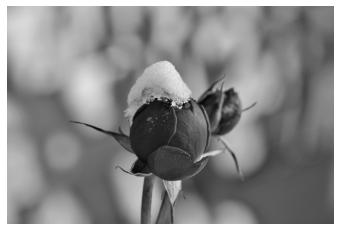

In [ ]:
plt.imshow(img_grayscale_u)
plt.axis("off");

In the simple thresholding method, we have to pass the parameter of threshold value to the function. So the threshold value is manually decided by the programmer after a lot of hits and trials whether the particular value is suitable for the image processing. This threshold value remains the same for every pixel and it is converted to 0 if its value is lesser than the threshold value and to 255 otherwise. This can be implemented with the cv2 library as follows:

In [ ]:
ret,thresh1 = cv.threshold(img_grayscale_u,150,255, cv.THRESH_BINARY)

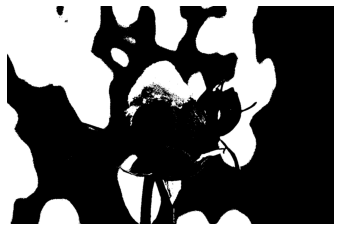

In [ ]:
plt.imshow(thresh1)
plt.axis("off");

## Adaptive thresholding

This method is sometimes more useful for binarization when the image has different lighting conditions. In the simple thresholding, we used a global threshold value for all pixels. In the case of adaptive thresholding, the algorithm divides the image into smaller regions and automatically determines the threshold value for each smaller region. This gives much better results than the global thresholding

In [ ]:
# th2 =cv.adaptiveThreshold(img_grayscale_u,
#                           255,
#                           cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

## Otsu’s Thresholding

This technique of Otsu’s thresholding is similar to the technique of simple thresholding. The only major difference is that here we don’t have to choose the global value of the threshold, unlike simple thresholding which explicitly requires the value of the threshold. This algorithm determines the threshold value automatically and applies it to get the best result. It is also implemented similarly, just cv.THRESH_OTSU is passed as an extra parameter.

# Contour Detection
A contour is a closed curve that joins points in images with similar colors or intensities. As it is based on intensity of the pixels, it performs better with binary images, especially with black background and white objects. A contour detects a closed figure unlike edge detection where only the boundary of an object is outlined. Hence, contour can be visualized as the connection of edges to form an object. Contours can be played around for multiple object detections according to sizes and intensities, cropping objects and so on. Contours are widely used in topological as well as medical applications.

In [ ]:
!pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imutils

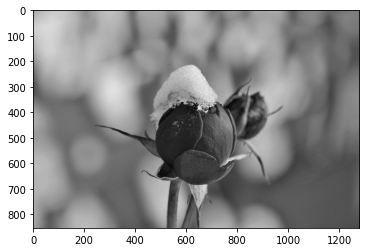

In [ ]:
gray = cv.bilateralFilter(img_grayscale_u, 3, 5, 5)
plt.imshow(gray)

In [ ]:
edged = cv.Canny(gray, 100, 200)
edged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 1279.5, 852.5, -0.5)

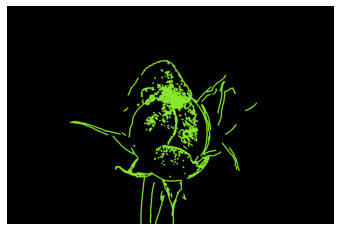

In [ ]:
cnts = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
img = cv.cvtColor(edged, cv.COLOR_GRAY2BGR)  #add this line
img = cv.drawContours(img, cnts, -1, (136, 231, 46), 3) 
plt.imshow(img)
plt.axis('off')

#bilateralfilter(image, diameter, sigmaColor, sigmaSpace): blurs the image with filter by keeping edged sharp. sigmaColor specifies the influence of neighborhood pixels while diameter specifies are to look to neighborhood
#threshdold(image): return the images in binary
#findContours(image): return a list of contours with a collection of all points
#drawContours(image, color): returns an image with drawing the contours in the image specified with specified color. Color can be changed as per their RBG codes.

# Morphological Operations

Morphological operations are a set of mathematical functions, known as non-linear filters in image processing that process the image on the basis of morphology or shape. These nonlinear filters depend on the relative positions of the pixels as the value of the pixel is changed according to the neighboring pixels. This makes them suitable for binary image processing. The changes in the images are done by a small binary filter or kernel known as a structuring element.

In [ ]:
import numpy as np

In [ ]:
#Structuring element with numpy and opencv
# Create a structuring element with numpy
se_numpy = np.ones((3,3), np.uint8)
se_numpy

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [ ]:
# Create a structuring element with opencv
se_cv2 = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
se_cv2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

## Erosion

(-0.5, 1279.5, 852.5, -0.5)

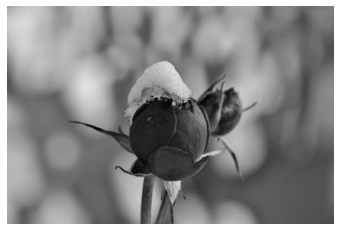

In [ ]:
# erode(img, kernel, iterations): returns an eroded image with the kernel size with specified number of iterations
im1_erosion = cv.erode(img_grayscale_u, se_cv2, iterations=1)
plt.imshow(im1_erosion)
plt.axis('off')

## Dilation



(-0.5, 1279.5, 852.5, -0.5)

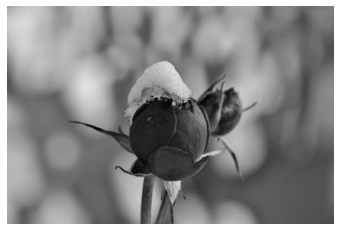

In [ ]:
# dilate(img, kernel, iterations): returns an eroded image with the kernel size with specified number of iterations
im1_dilate = cv.dilate(img_grayscale_u, se_cv2, iterations=1)
plt.imshow(im1_erosion)
plt.axis('off')

In [ ]:
#define percentage for scaling the image (resolution changes)
percentage = 50

#calculate width and height of image according to percentage
width = int(img_unchanged.shape[1] * percentage/ 100)
height = int(img_unchanged.shape[0] * percentage/ 100)

print(width)
print(height)

640
426


# RGB to HSV

(-0.5, 1279.5, 852.5, -0.5)

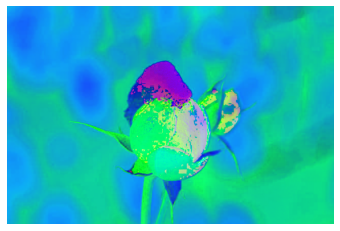

In [ ]:
# convert the image to hsv
#cvtColor(image, operator): returns the resulting image after applying the specifying operator
rgb_to_hsv = cv.cvtColor(img_unchanged, cv.COLOR_BGR2HSV)
plt.imshow(rgb_to_hsv)
plt.axis('off')

In [ ]:
#define the lower and upper range for red color
lower_yellow = np.array([30,150,50])
upper_yellow = np.array([255,255,180])

In [ ]:
#create mask for yellow color using the range for hsv values
mask_for_color = cv.inRange(rgb_to_hsv, lower_yellow, upper_yellow)
mask_for_color

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# bitwise and of the image and mask
bitwise_result = cv.bitwise_and(img_unchanged, img_unchanged,
                                mask= mask_for_color)

bitwise_result

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f75a3931150>,
 Text(0.5, 1.0, 'Masked Red color'))

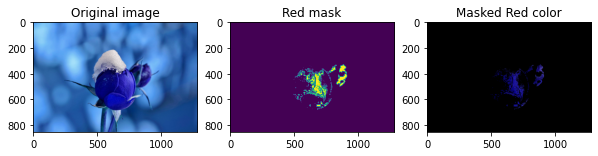

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(1,3,1), plt.imshow(img_unchanged), plt.title('Original image')
plt.subplot(1,3,2),plt.imshow(mask_for_color), plt.title('Red mask')
plt.subplot(1,3,3),plt.imshow(bitwise_result), plt.title('Masked Red color')

In [ ]:
# dstimg = cv2.resize(srcimg,(x_,y_))